# Introduction to Graph-theory

[Graph-theory](https://en.wikipedia.org/wiki/Graph_theory) is the study of graphs,
which are mathematical structures used to model pairwise relations between objects.

Graphs are among the most ubiquitous models of both natural and human-made structures.
They can model many types of relations and process dynamics in physical, biological
and social systems. In computer science, they can represent networks of communication,
data organization, computational devices, the flow of computation, etc.
Graphs are one of the principal objects of study in
[discrete mathematics](https://en.wikipedia.org/wiki/Discrete_mathematics).

![6 nodes](images/6nodes.png)

| alias | name used in<br>Graph-theory | description | syntax |
|---|:---:|---|---|
|node, vertice, point| **node** | an intersection of edges |  `g.add_node('x')` |
| edge, line, link| **edge** | the line that connects intersections  | `g.add_edge('a','b')`|
| the weight, cost or value of an edge | **value** | numeric value of an edge  | `g.add_edge('a','b',value=4)`|
|in-degree | **in_degree**| the number of incoming edges | `g.in_degree('a')` |
|out-degree| **out_degree**| the number of outgoing edges| `g.out_degree('b')` |
|path| **path**| an ordered collection of nodes | (a list of nodes) |
|distance, length, costs| **---**  | the sum of values of a set of edges | (number) |
| subgraph | **subgraph**| the nodes and edges of *g'* exists in *g* ||


To add nodes the syntax is simple

In [1]:
from graph import Graph
g = Graph()
g.add_node('C')
print(g)

Graph(1 nodes, 0 edges)


To associate the node with an object, you can use the `obj` keyword like this:

In [2]:
g.add_node('C', obj={'monty':'python'})

This save you from managing the objects externally and permits algorithms to use the object directly.

To retrieve the object use:

In [3]:
g.node('C')

{'monty': 'python'}

And to delete the node use:


In [4]:
g.del_node('C')

To add edges the syntax is equally simple:

In [5]:
from graph import Graph
g = Graph()
g.add_edge('A', 'B', value=4)
print(g)

Graph(2 nodes, 1 edges)


To get all edges use:

In [6]:
g.edges()

[('A', 'B', 4)]

Or to view a specific edge `value`, use:

In [7]:
g.edge('A', 'B')

4

As you see, `g.edges()` returns a list of immutable tuples with `(from, to, value)`.  

Note that it isn't necessary to add the nodes first. When you use `g.add_edge(...)` the library will detect that the nodes haven't been created and add them quietly.

If you need to update the value on the edge just use `g.add_edge('A','B', value=10)` again.
The edge works like a dictionary, where the pair of node `'A'` and `'B'` is the key where the `10` is the value.

In some cases it is not required for the graph to be directed. Mathematicians call this undirected.
In Python a principal philosophy is that *explicit is better than implicit*, so in graph-theory *undirected* is interpreted as bidirectional. To make this explicit when adding edges, either add an edge for both directions, or use the keyword `bidirectional` which is a helper for doing these to step in one step:

|this... | ...is the same as this|
|---|---|
|`g.add_edge('A','B')`<br>`g.add_edge('B','A')`|`g.add_edge('A','B', bidirectional=True)`|

In other cases multiple edges between nodes are required. Graph-theory allows this using
dummy nodes. Here's an example:

The graph will store the in- and -out-degree of every node when the edges are added and removed, so the in_degree and out_degree is available immediately e.g. ($O(1)$ [computational complexity](https://wiki.python.org/moin/TimeComplexity)). Here's an example:

In [8]:
g.in_degree('A')

0

In [9]:
g.out_degree('A')

1

Finally, to delete an edge, simply use:

In [10]:
g.del_edge('A','B')

To replicate the graph in the image in the begging of this section, we will use a helper from the graphs initialization methods `from_list`:

In [11]:
g = Graph(from_list=[(1,2),(2,3),(3,4),(4,5),(5,6),(5,1),(2,5)])

As we can't create a bidirectional graph implicitly, we can do so explicitly:

In [12]:
g.from_list([(end,start,value) for start,end,value in g.edges()])

I chose this example deliberately as it illustrates the ability to update the graph from a list of nodes, even if that list comes from the graph itself. I also wanted to show the idiomatic use of list comprehensions for reading `start`, `end`, `value` from the method `g.edges()`.

The reverse operation `to_list` also exists:

In [13]:
g.to_list()

[(1, 2, 1),
 (1, 5, 1),
 (2, 3, 1),
 (2, 5, 1),
 (2, 1, 1),
 (3, 4, 1),
 (3, 2, 1),
 (4, 5, 1),
 (4, 3, 1),
 (5, 6, 1),
 (5, 1, 1),
 (5, 2, 1),
 (5, 4, 1),
 (6, 5, 1),
 (1,),
 (2,),
 (3,),
 (4,),
 (5,),
 (6,)]

The method lists all edges first, followed by all nodes

If, you have the need to lookup particular edges or values directly `to_dict` may be more convenient:

In [14]:
g.to_dict()

{1: {2: 1, 5: 1},
 2: {3: 1, 5: 1, 1: 1},
 3: {4: 1, 2: 1},
 4: {5: 1, 3: 1},
 5: {6: 1, 1: 1, 2: 1, 4: 1},
 6: {5: 1}}

`to_dict`s inverse operation is `from_dict`, which behaves in the exact same way as `to_list`/`from_list`:

In [15]:
g2 = Graph(from_dict=g.to_dict())

Here we created `g2` from `g`.

In [16]:
g2.to_dict()

{1: {2: 1, 5: 1},
 2: {3: 1, 5: 1, 1: 1},
 5: {6: 1, 1: 1, 2: 1, 4: 1},
 3: {4: 1, 2: 1},
 4: {5: 1, 3: 1},
 6: {5: 1}}

This may seem as a long way to copy when the libray already has the method `g.copy()`. The difference between the two methods, though, is that `g2=Graph(from_list(g.to_list()))` does not copy the reference to objects that you may have set using `g.add_node('a', obj='!!!')`. `g.copy()` will copy there reference too.

In [17]:
from graph import Graph

g = Graph()
g.add_edge('A', 'B', value=4)  # a direct edge
g.add_edge('A', 'ab', value=2)  # dummy edge from A to dummy node ab
g.add_edge('ab', 'B', value=2)   # dummy edge from dummy node ab to B

Creating these dummy nodes by hand isn't very effective, so if you have a list of edges like in the example below it is good to know that nodes can be any hashable object, e.g. tuples, strings, numbers, ...

In [18]:
L = [('A','B',4), ('A','B',3), ('A','B',2)]
g = Graph()
for edge in L:
        start,end,value = edge  # using the edge tuple as dummy node.
        g.add_edge(start, edge, value) # adding the value on the way to the dummy node.
        g.add_edge(edge, end, 0)  # adding zero as the value has already been added.

for edge in g.edges():
    print(edge)

('A', ('A', 'B', 4), 4)
('A', ('A', 'B', 3), 3)
('A', ('A', 'B', 2), 2)
(('A', 'B', 4), 'B', 0)
(('A', 'B', 3), 'B', 0)
(('A', 'B', 2), 'B', 0)


The benefit of doing this is that most algorithms are simpler to implement (and understand!) when dummy nodes are explicit. As an outset you will always know your list of "real" nodes and can hence exclude dummy nodes when reading through the list of nodes. It would for example be silly to search for a dummy node when looking for the shortest path between two "real" nodes, as it is a pragmatic assumption that the algorithm will only have to search for the shortest path between two meaningful points.

### Inspecting the source code

Since we are at this, you can count on all algorithms being available directly on the `Graph` class,
so that, for example the shortest path algorithm is available as:

```
g.shortest_path('A','B')
```

All the documentation is also available using the built-in help menu:

In [19]:
help(Graph.shortest_path)

Help on function shortest_path in module graph:

shortest_path(self, start, end, memoize=False, avoids=None)
    :param start: start node
    :param end: end node
    :param memoize: boolean (stores paths in a cache for faster repeated lookup)
    :param avoids: optional. A frozen set of nodes that cannot be on the path.
    :return: distance, path as list



If you want a more detail description of what is going on, it is often helpful to directly to the specific function.

In [20]:
import inspect

In [21]:
print(inspect.getsource(Graph.shortest_path))

    def shortest_path(self, start, end, memoize=False, avoids=None):
        """
        :param start: start node
        :param end: end node
        :param memoize: boolean (stores paths in a cache for faster repeated lookup)
        :param avoids: optional. A frozen set of nodes that cannot be on the path.
        :return: distance, path as list
        """
        if not memoize:
            return shortest_path(graph=self, start=start, end=end, avoids=avoids)

        if self._cache is None:
            self._cache = ShortestPathCache(graph=self)
        return self._cache.shortest_path(start, end, avoids=avoids)



Here you see that Graph wraps the function `shortest_path` and, should you choose to use the keyword `memoize=True` that it uses the class `ShortestPathCache`.

These can be inspected again in the same way:

In [22]:
from graph import shortest_path  # getting the function behind Graph.shortest_path
print(inspect.getsource(shortest_path))  # viewing the code

def shortest_path(graph, start, end, avoids=None):
    """ single source shortest path algorithm.
    :param graph: class Graph
    :param start: start node
    :param end: end node
    :param avoids: optional set,frozenset or list of nodes that cannot be a part of the path.
    :return distance, path (as list),
            returns float('inf'), [] if no path exists.
    """
    if not isinstance(graph, (BasicGraph, Graph, Graph3D)):
        raise TypeError(f"Expected BasicGraph, Graph or Graph3D, not {type(graph)}")
    if start not in graph:
        raise ValueError(f"{start} not in graph")
    if end not in graph:
        raise ValueError(f"{end} not in graph")
    if avoids is None:
        visited = set()
    elif not isinstance(avoids, (frozenset, set, list)):
        raise TypeError(f"Expect obstacles as set or frozenset, not {type(avoids)}")
    else:
        visited = set(avoids)

    q, minimums = [(0, 0, start, ())], {start: 0}
    i = 1
    while q:
        (cost, _, v1, pa

The code is very well annotated, so if the code doesn't explain itself, feel free to ask for a more elaborate example on the [github repo](https://github.com/root-11/graph-theory/issues).

Graph-theory tries to be transparent about everything it does. As the readme on the frontpage says: 

> with code you can explain to your boss

### Graphs ready for usage

To ease the learning curve, I've added a collection of graphs that are ready for import.
Here's one that should be familiar to most Europeans:

![london underground from https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/London_Underground_Overground_DLR_Crossrail_map_zone.svg/2500px-London_Underground_Overground_DLR_Crossrail_map_zone.svg.png](images/2500pxLondon_Underground_Overground.png)

In [23]:
from graphs import london_underground

In [24]:
g = london_underground()
print(g)

Graph(302 nodes, 698 edges)


Each node in the graph is the latitude, longitude and station name

In [25]:
g.node(11)

(51.5226, -0.1571, 'Baker Street')

In [26]:
for station_nr in g.nodes(to_node=11):
    print(g.node(station_nr))

(51.5225, -0.1631, 'Marylebone')
(51.5234, -0.1466, "Regent's Park")
(51.5203, -0.17, 'Edgware Road (C)')
(51.5238, -0.1439, 'Great Portland Street')
(51.5142, -0.1494, 'Bond Street')
(51.5347, -0.174, "St. John's Wood")
(51.5472, -0.1803, 'Finchley Road')


Let's make a map

In [27]:
stations = {station: g.node(station) for station in g.nodes()}
london_map = Graph()
for start,end,distance in g.edges():
    lat1,lon1,name1 = stations[start]
    lat2,lon2,name2 = stations[end]
    london_map.add_edge((lon1,lat1), (lon2,lat2))

london_map.nodes()[:3]

[(-0.1571, 51.5226), (-0.1631, 51.5225), (-0.1466, 51.5234)]

In [28]:
from graph.visuals import plot_2d

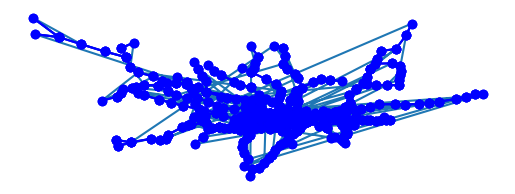

In [29]:
plot = plot_2d(london_map)
plot.show()

Not exactly what you expected? Well there's a reason why the London overground map is famous for its readability in comparison to raw latitudes and longitudes.